In [1]:
!pwsh -Command "Invoke-WebRequest -Uri https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv -OutFile data.csv"

In [2]:
import pandas as pd
import numpy as np

In [7]:
df_raw = pd.read_csv('data.csv')

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
features = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
data = df_raw[features]

In [10]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [12]:
data.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [15]:
data = data.fillna(0)
data.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [18]:
data['above_average'] = (data.msrp > data.msrp.mean()).astype(int)

In [22]:

del data['msrp']
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [27]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Question 1

In [31]:
from sklearn.metrics import roc_auc_score

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7148 non-null   object 
 1   model              7148 non-null   object 
 2   year               7148 non-null   int64  
 3   engine_hp          7148 non-null   float64
 4   engine_cylinders   7148 non-null   float64
 5   transmission_type  7148 non-null   object 
 6   vehicle_style      7148 non-null   object 
 7   highway_mpg        7148 non-null   int64  
 8   city_mpg           7148 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 502.7+ KB


In [37]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [39]:
def calculate_rocauc(series):
    score = roc_auc_score(y_train, series)
    if score < .5:
        score = roc_auc_score(y_train, -series)
    return score
rocaucscore_fornum = df_train[numerical].apply(calculate_rocauc)
rocaucscore_fornum = rocaucscore_fornum.sort_values(ascending=False).to_frame(name='ROC_AUC')
rocaucscore_fornum


,ROC_AUC
engine_hp,0.917103
engine_cylinders,0.766116
year,0.687551
city_mpg,0.673424
highway_mpg,0.633059


#### Answer: engine_hp

### Question 2

In [41]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [43]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [46]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
##churn_decision = (y_pred >= 0.5)
##(y_val == churn_decision).mean()

Confusion table

In [57]:
from sklearn.metrics import roc_curve

In [58]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [59]:
import matplotlib.pyplot as plt

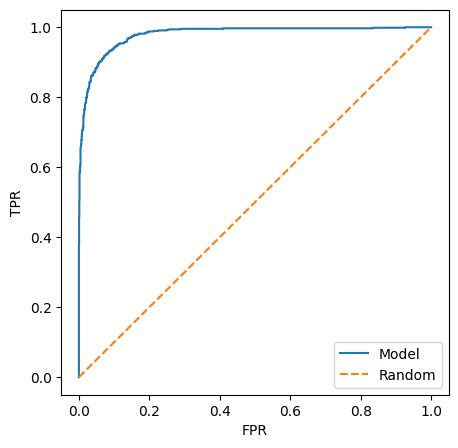

In [60]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [61]:
from sklearn.metrics import auc

In [62]:
auc(fpr, tpr)

0.9790336815928319

In [63]:
from sklearn.metrics import roc_auc_score

In [65]:
round(roc_auc_score(y_val, y_pred), 3)

0.979

#### Answer 0.979

### Question 3

In [66]:
def precision_and_recall(threshold):
    predict_positive = (y_pred >= threshold)
    predict_negative = (y_pred < threshold)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    return p, r


In [69]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [70]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
precisions = []
recalls = []

for t in thresholds:
    p,r = precision_and_recall(t)
    precisions.append(p)
    recalls.append(r)

C:\Users\sasha\AppData\Local\Temp\ipykernel_8552\1435242287.py:8: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [71]:
precisions

[0.27444397817876626,
 0.4611032531824611,
 0.5070093457943925,
 0.5402489626556016,
 0.5701754385964912,
 0.585058505850585,
 0.6039142590866728,
 0.6159695817490495,
 0.6355599214145383,
 0.6498993963782697,
 0.6584867075664622,
 0.6729559748427673,
 0.6866310160427808,
 0.6968375136314068,
 0.7077777777777777,
 0.7256027554535017,
 0.734192037470726,
 0.7382075471698113,
 0.7428571428571429,
 0.7446300715990454,
 0.7560679611650486,
 0.7594627594627594,
 0.770573566084788,
 0.7744360902255639,
 0.7804568527918782,
 0.7871794871794872,
 0.7945383615084526,
 0.7953063885267275,
 0.8013157894736842,
 0.8044914134742405,
 0.807743658210948,
 0.8120805369127517,
 0.8159675236806495,
 0.819047619047619,
 0.8287292817679558,
 0.8335664335664336,
 0.8392101551480959,
 0.839943342776204,
 0.8411347517730496,
 0.8428571428571429,
 0.8477011494252874,
 0.8536231884057971,
 0.8579795021961932,
 0.8613569321533924,
 0.8645833333333334,
 0.8704819277108434,
 0.8729198184568835,
 0.876524390243902

In [72]:
recalls

[1.0,
 0.9969418960244648,
 0.9954128440366973,
 0.9954128440366973,
 0.9938837920489296,
 0.9938837920489296,
 0.9908256880733946,
 0.9908256880733946,
 0.9892966360856269,
 0.9877675840978594,
 0.9847094801223242,
 0.981651376146789,
 0.981651376146789,
 0.9770642201834863,
 0.9740061162079511,
 0.9663608562691132,
 0.9587155963302753,
 0.9571865443425076,
 0.9541284403669725,
 0.9541284403669725,
 0.9525993883792049,
 0.9510703363914373,
 0.944954128440367,
 0.944954128440367,
 0.9403669724770642,
 0.9388379204892966,
 0.9342507645259939,
 0.9327217125382263,
 0.9311926605504587,
 0.9311926605504587,
 0.9250764525993884,
 0.9250764525993884,
 0.9220183486238532,
 0.9204892966360856,
 0.9174311926605505,
 0.9113149847094801,
 0.9097859327217125,
 0.9067278287461774,
 0.9067278287461774,
 0.9021406727828746,
 0.9021406727828746,
 0.900611620795107,
 0.8960244648318043,
 0.8929663608562691,
 0.8883792048929664,
 0.8837920489296636,
 0.882262996941896,
 0.8792048929663608,
 0.8730886850

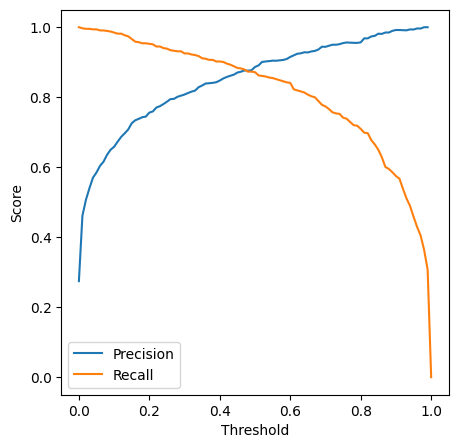

In [73]:
plt.figure(figsize=(5, 5))

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')

plt.legend()

In [89]:
scores = pd.DataFrame(columns=['threshold', 'precision', 'recall'])
scores['threshold'] = thresholds
scores['precision'] = precisions
scores['recall'] = recalls



In [95]:
scores[(abs(scores.recall-scores.precision))<.01]

,threshold,precision,recall
46,0.46,0.872920,0.882263
47,0.47,0.876524,0.879205
48,0.48,0.875767,0.873089
49,0.49,0.877112,0.873089


#### Answer 0.48

### Question 4

In [96]:
scores['f1_score'] = 2*scores['precision']*scores['recall']/(scores['precision']+scores['recall'])
scores

,threshold,precision,recall,f1_score
0,0.00,0.274444,1.000000,0.430688
1,0.01,0.461103,0.996942,0.630561
2,0.02,0.507009,0.995413,0.671827
3,0.03,0.540249,0.995413,0.700377
4,0.04,0.570175,0.993884,0.724638
...,...,...,...,...
96,0.96,0.996454,0.429664,0.600427
97,0.97,0.996241,0.405199,0.576087
98,0.98,1.000000,0.363914,0.533632
99,0.99,1.000000,0.307339,0.470175


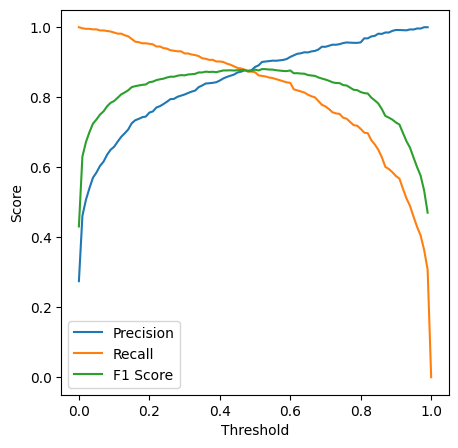

In [98]:
plt.figure(figsize=(5, 5))

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, scores['f1_score'], label='F1 Score')

plt.xlabel('Threshold')
plt.ylabel('Score')

plt.legend()

In [102]:
scores.sort_values('f1_score', ascending=False)

,threshold,precision,recall,f1_score
52,0.52,0.900800,0.860856,0.880375
53,0.53,0.902087,0.859327,0.880188
54,0.54,0.903226,0.856269,0.879121
50,0.50,0.886470,0.871560,0.878951
55,0.55,0.904531,0.854740,0.878931
...,...,...,...,...
97,0.97,0.996241,0.405199,0.576087
98,0.98,1.000000,0.363914,0.533632
99,0.99,1.000000,0.307339,0.470175
0,0.00,0.274444,1.000000,0.430688


#### Answer 0.52

### Question 5

In [103]:
from sklearn.model_selection import KFold

In [104]:
!py -m pip install tqdm

In [105]:
from tqdm.auto import tqdm

c:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [116]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [110]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [114]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9531 entries, 2711 to 235
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               9531 non-null   object 
 1   model              9531 non-null   object 
 2   year               9531 non-null   int64  
 3   engine_hp          9531 non-null   float64
 4   engine_cylinders   9531 non-null   float64
 5   transmission_type  9531 non-null   object 
 6   vehicle_style      9531 non-null   object 
 7   highway_mpg        9531 non-null   int64  
 8   city_mpg           9531 non-null   int64  
 9   above_average      9531 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 781.8+ KB


In [117]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average
    y_val = df_val.above_average

    del df_train['above_average']
    del df_val['above_average']

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (1.0, np.mean(scores), np.std(scores)))



C=1.0 0.979 +- 0.003


#### Answer 0.003

### Question 6

In [126]:
for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average
        y_val = df_val.above_average

        del df_train['above_average']
        del df_val['above_average']

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 25%|██▌       | 1/4 [00:00<00:02,  1.01it/s]

C=0.01 0.952 +- 0.002


 50%|█████     | 2/4 [00:02<00:02,  1.01s/it]

C=0.1 0.972 +- 0.002


 75%|███████▌  | 3/4 [00:03<00:01,  1.08s/it]

C=0.5 0.978 +- 0.001


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]

C=10 0.983 +- 0.003


#### Answer 10